In [1]:
import json
import matplotlib.pyplot as plt

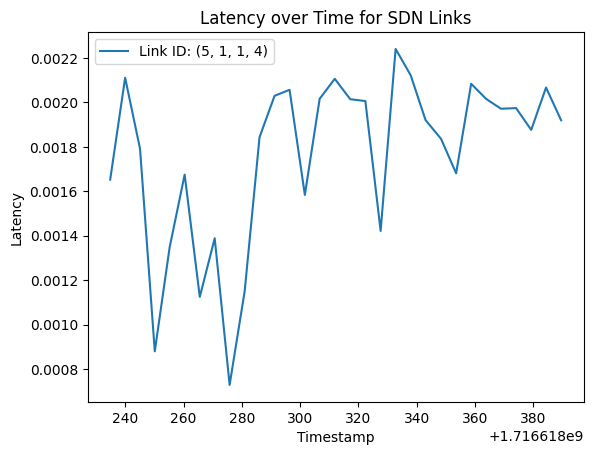

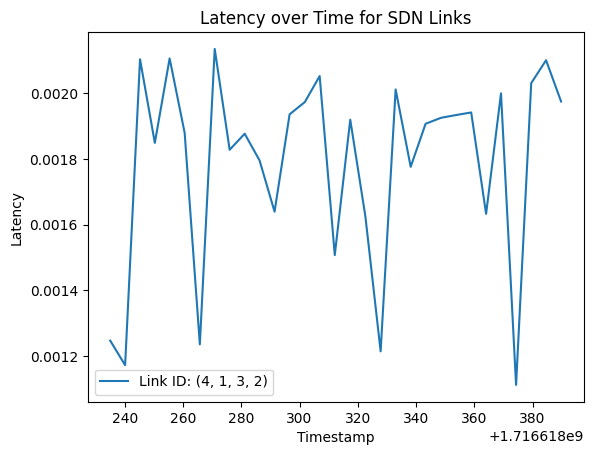

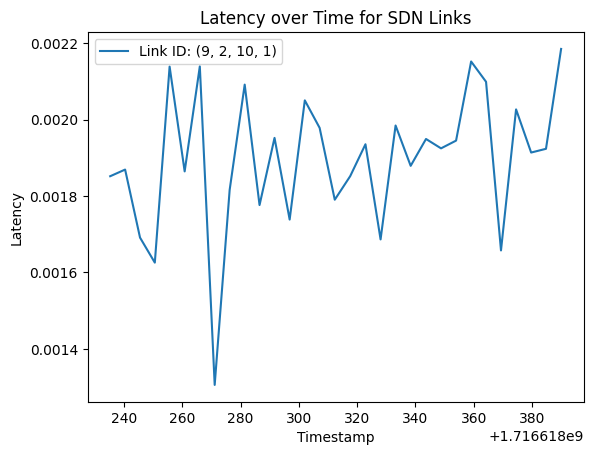

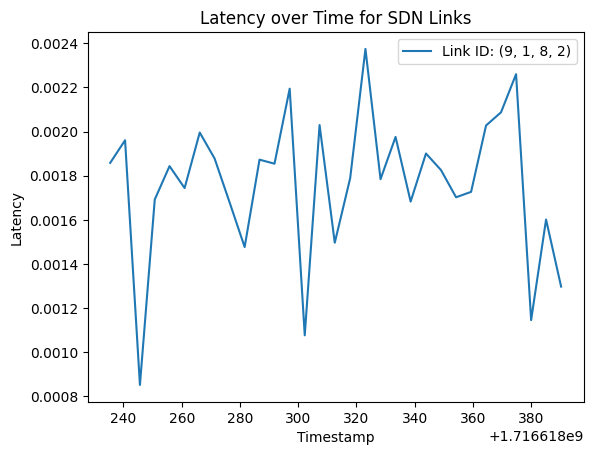

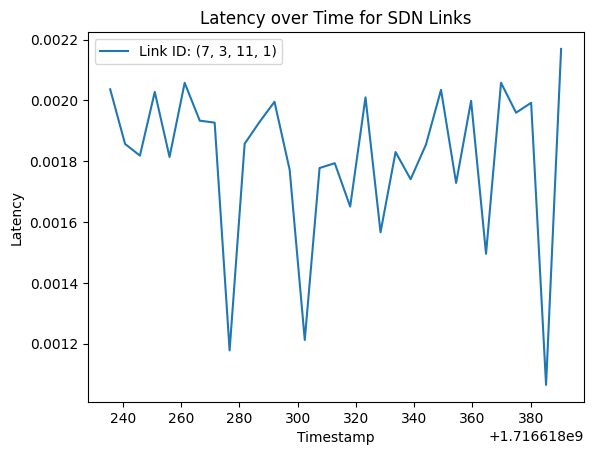

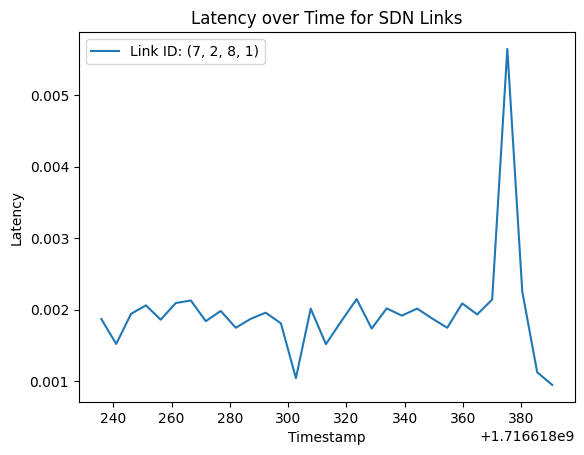

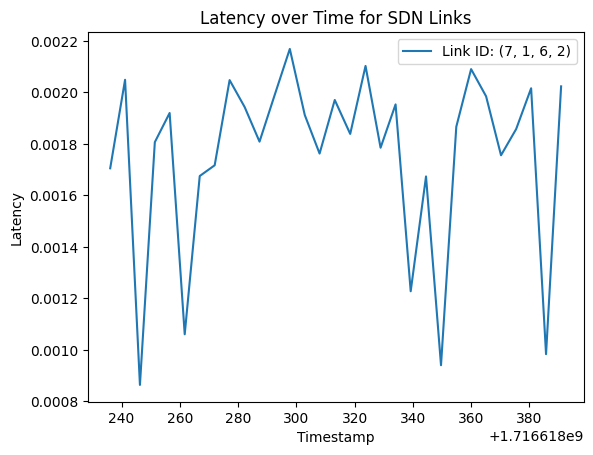

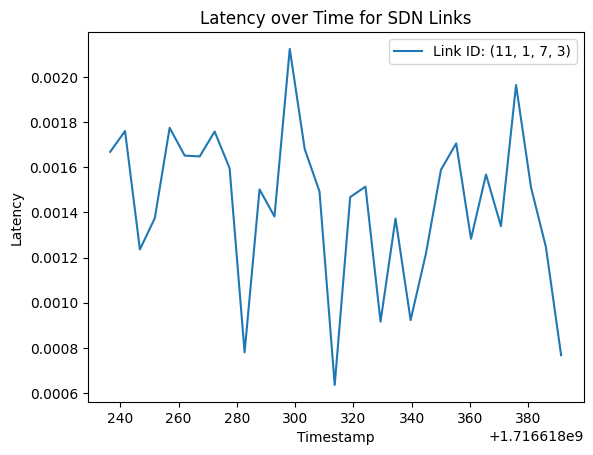

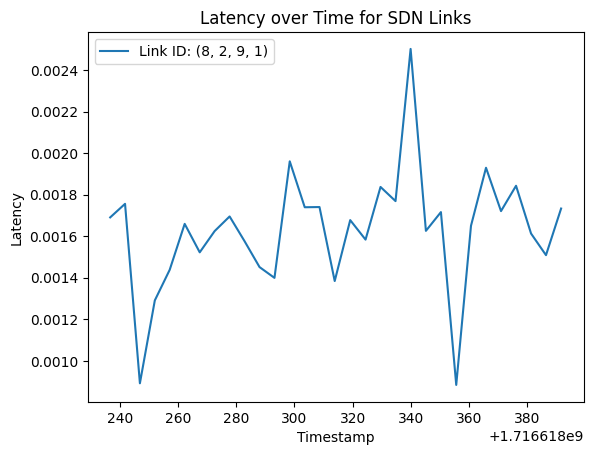

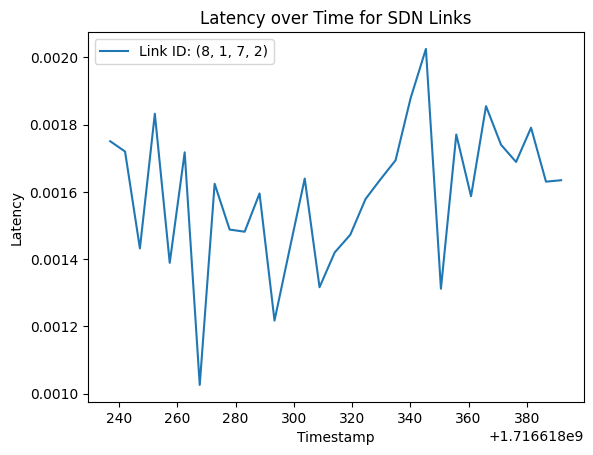

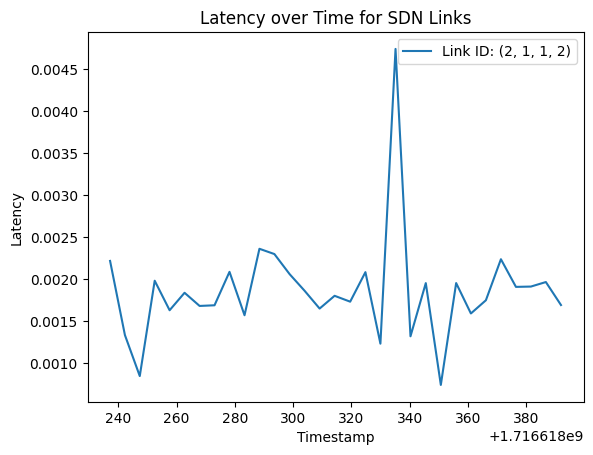

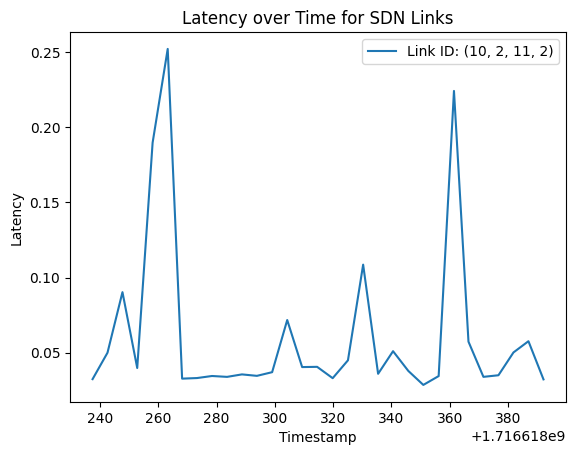

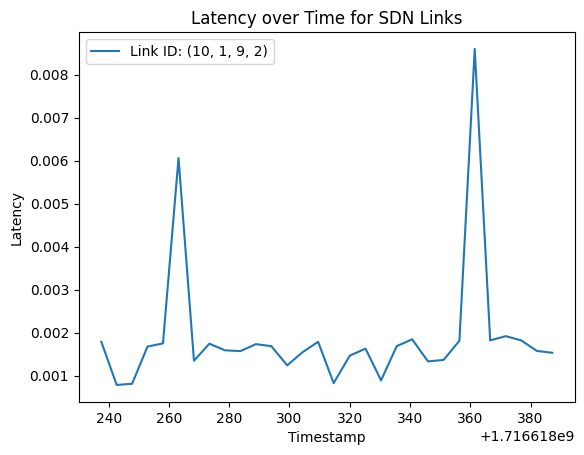

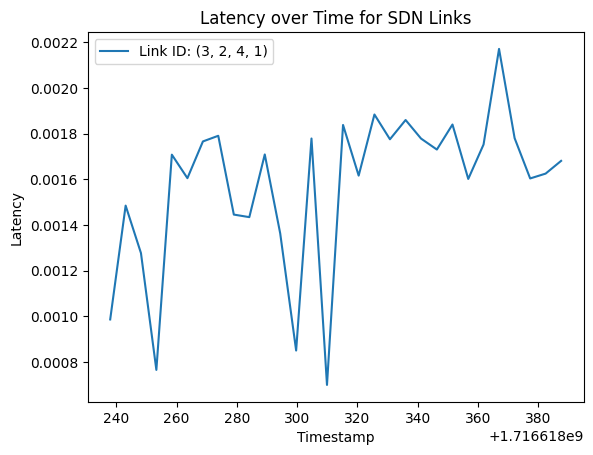

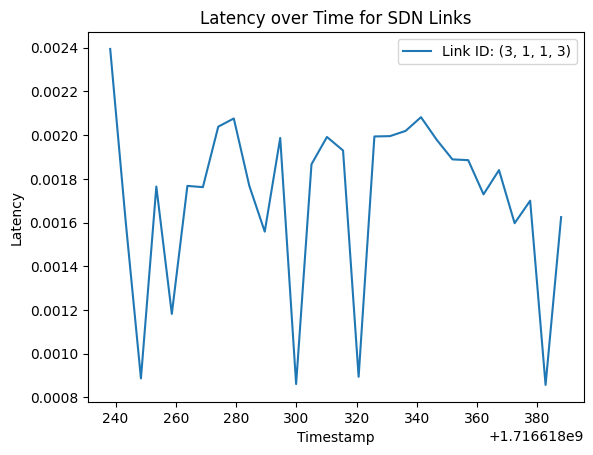

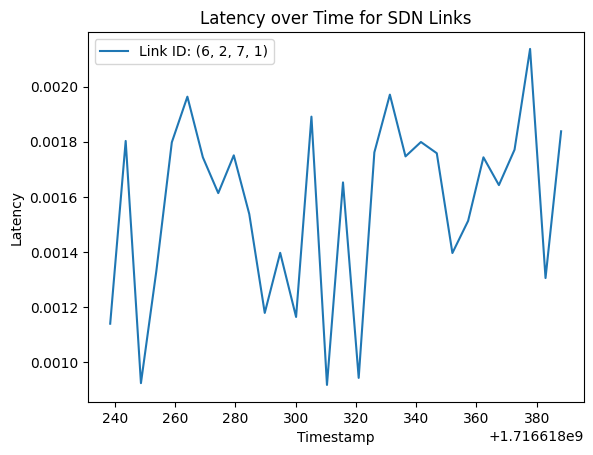

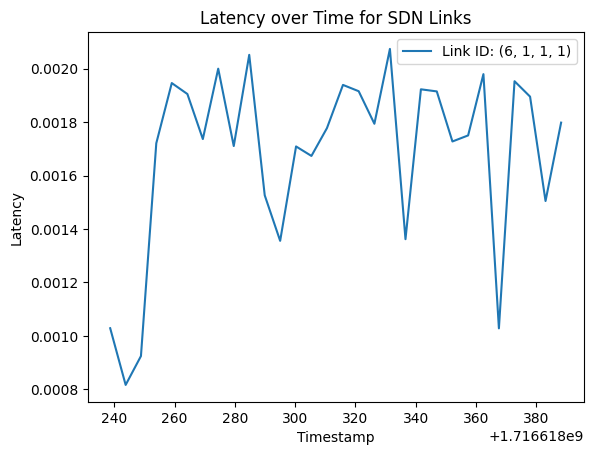

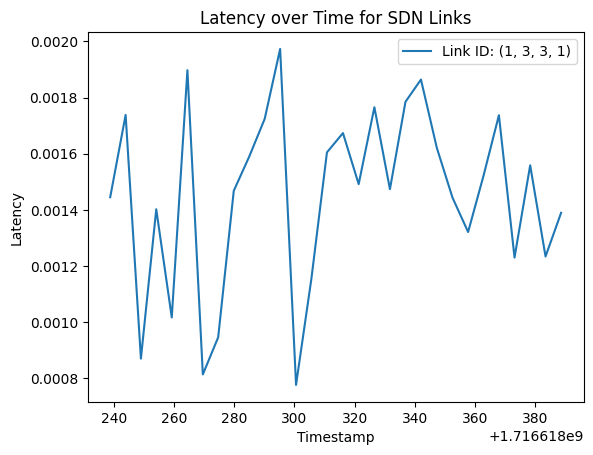

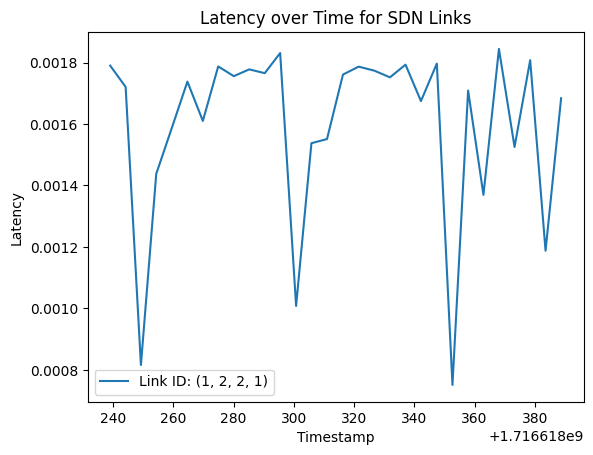

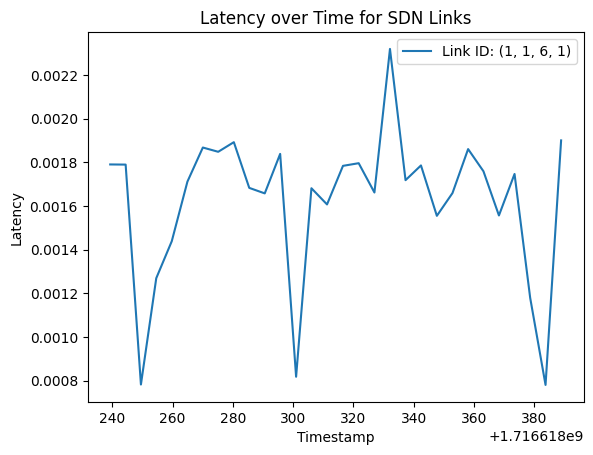

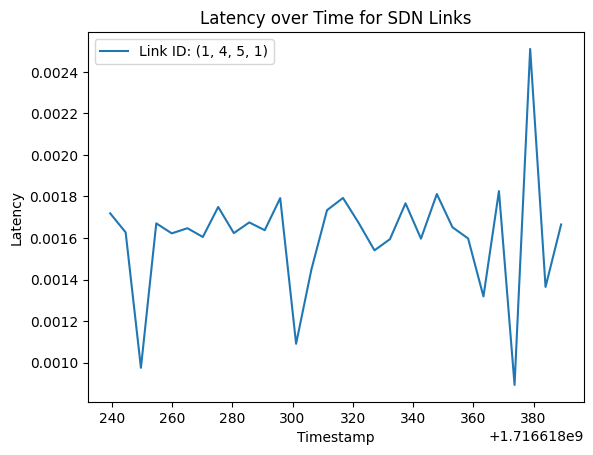

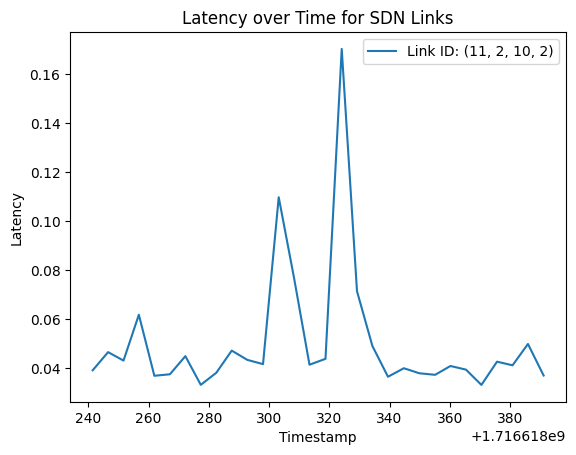

In [2]:
with open('timeseries.json', 'r') as file:
    sdn_data = json.load(file)

# Plot all latency data on the same plot
for link_id, latency_data in sdn_data.items():
    timestamps = [entry[0] for entry in latency_data]
    latencies = [entry[1] for entry in latency_data]
    
    plt.plot(timestamps, latencies, label=f'Link ID: {link_id}')
    plt.xlabel('Timestamp')
    plt.ylabel('Latency')
    plt.title('Latency over Time for SDN Links')
    plt.legend()
    plt.show()




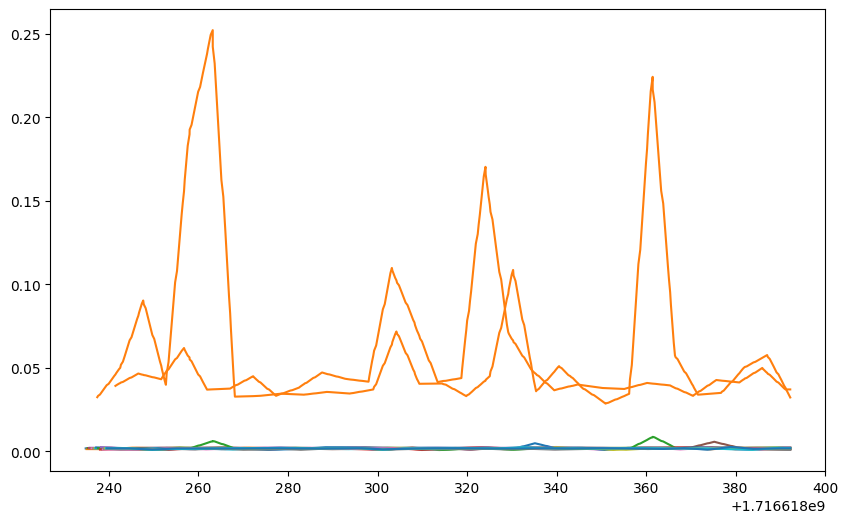

In [3]:
import numpy as np
import pandas as pd

# Create a DataFrame to store the latency data
data = {}
timestamps = set()
for link_id, latency_data in sdn_data.items():
    for entry in latency_data:
        timestamp, latency = entry
        timestamps.add(timestamp)
        if link_id not in data:
            data[link_id] = {}
        data[link_id][timestamp] = latency

# Ensure all timestamps are consistent
common_timestamps = sorted(list(timestamps))

# Fill missing values with NaN and create DataFrame
df = pd.DataFrame(index=common_timestamps, columns=data.keys())
for link_id, latency_data in data.items():
    for timestamp in common_timestamps:
        df.at[timestamp, link_id] = latency_data.get(timestamp, np.nan)

# Convert columns to numeric dtype
df = df.apply(pd.to_numeric, errors='coerce')

# Interpolate missing values
df.interpolate(method='linear', axis=0, inplace=True)

# Plot the original data
plt.figure(figsize=(10, 6))
for link_id in df.columns:
    plt.plot(df.index, df[link_id], label=f'Link ID: {link_id}')

## MOVING AVERAGE

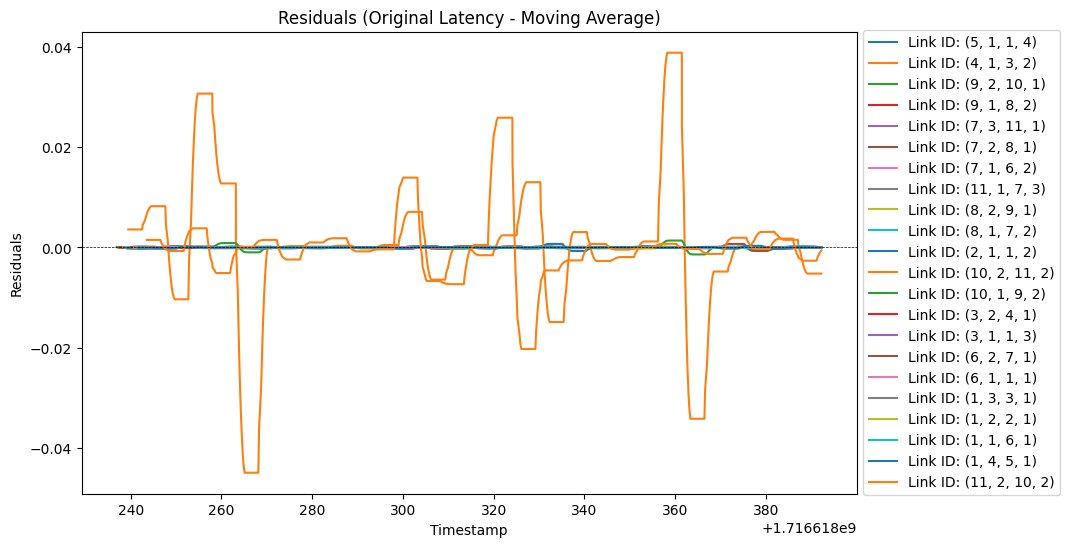

Anomalous Link IDs:
(10, 2, 11, 2)
(11, 2, 10, 2)


In [4]:
# Moving average anomaly detection
window = 10
moving_avg = df.rolling(window).mean()

# Calculate the residuals
residuals = df - moving_avg

# Plot the residuals
plt.figure(figsize=(10, 6))
for link_id in residuals.columns:
    plt.plot(residuals.index, residuals[link_id], label=f'Link ID: {link_id}')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.title('Residuals (Original Latency - Moving Average)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Define anomaly threshold
threshold = 0.02  # Adjust threshold as needed

# Find anomalous link IDs
anomalous_link_ids = []
for link_id in residuals.columns:
    if any(residuals[link_id].abs() > threshold):
        anomalous_link_ids.append(link_id)

# Print anomalous link IDs
print("Anomalous Link IDs:")
for link_id in anomalous_link_ids:
    print(link_id)

## ARIMA

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

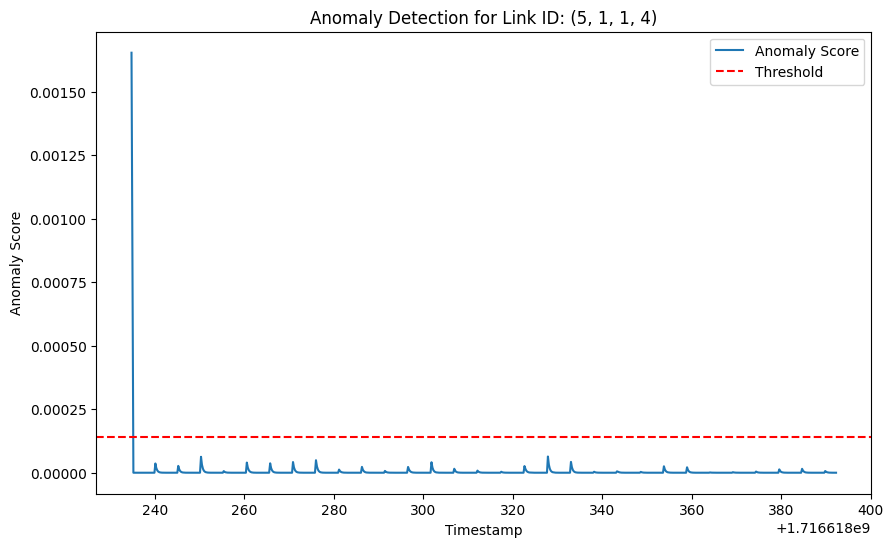

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


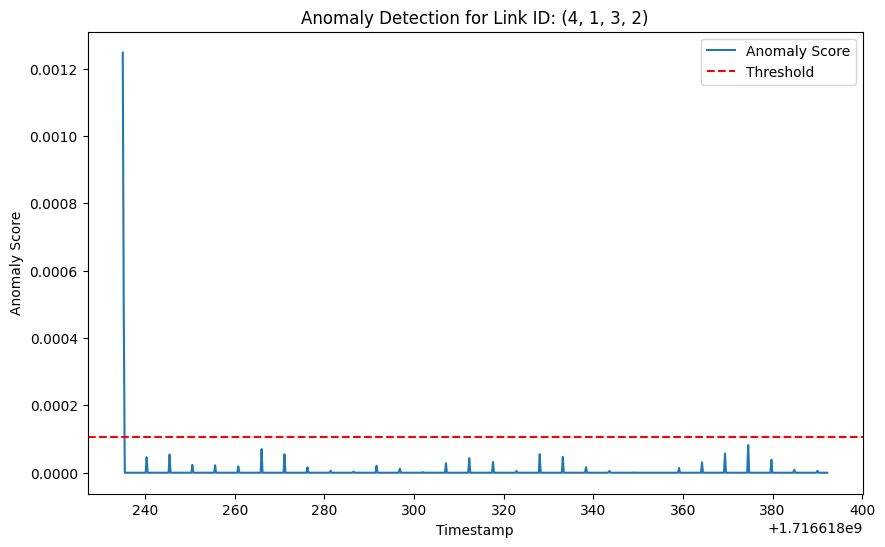

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\s

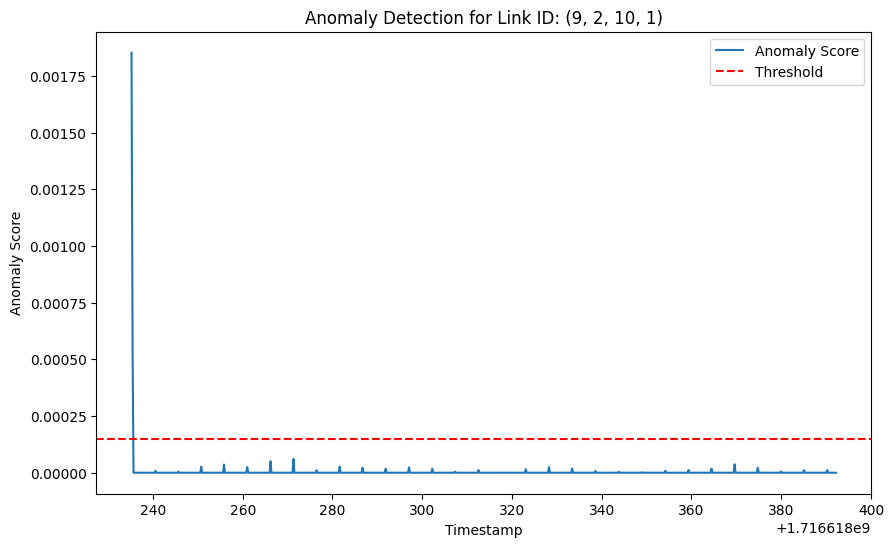

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

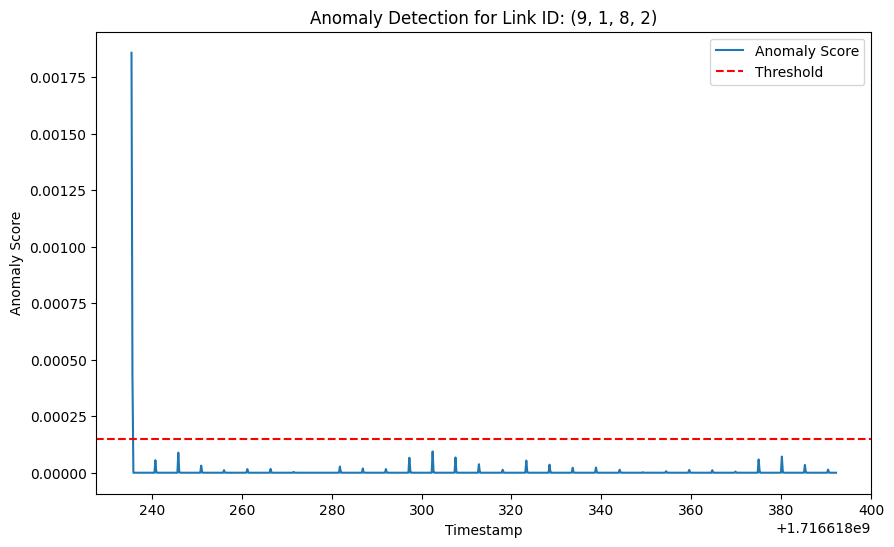

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


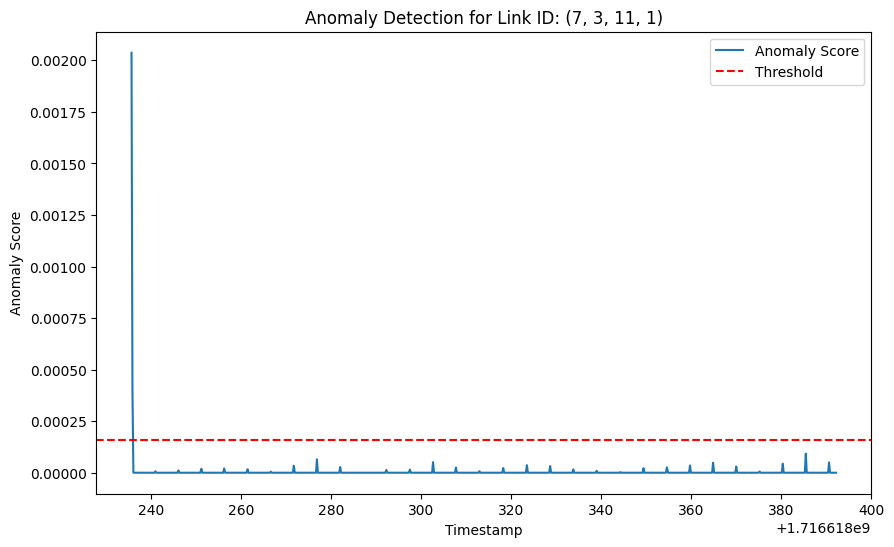

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

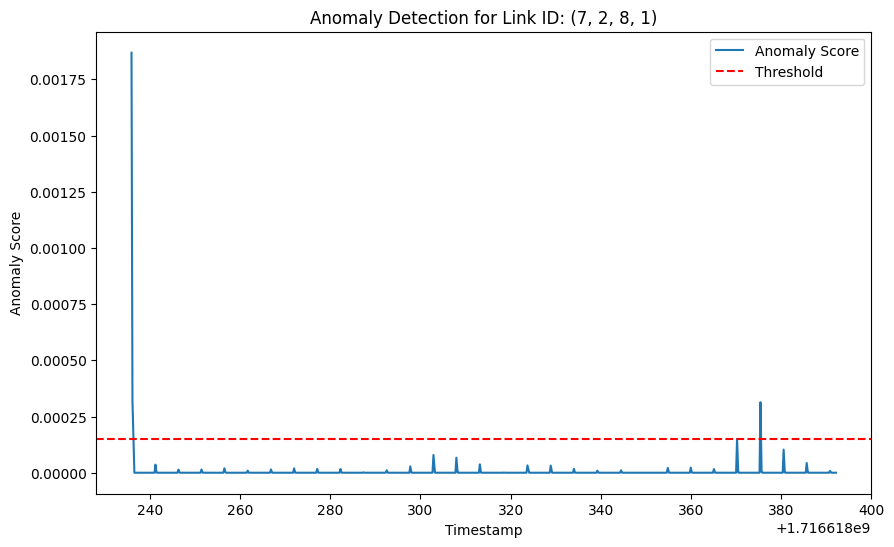

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

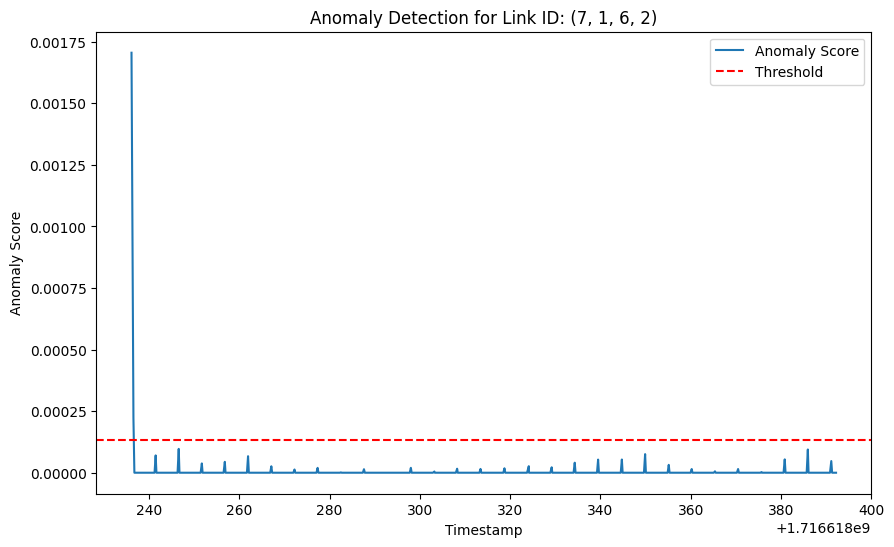

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

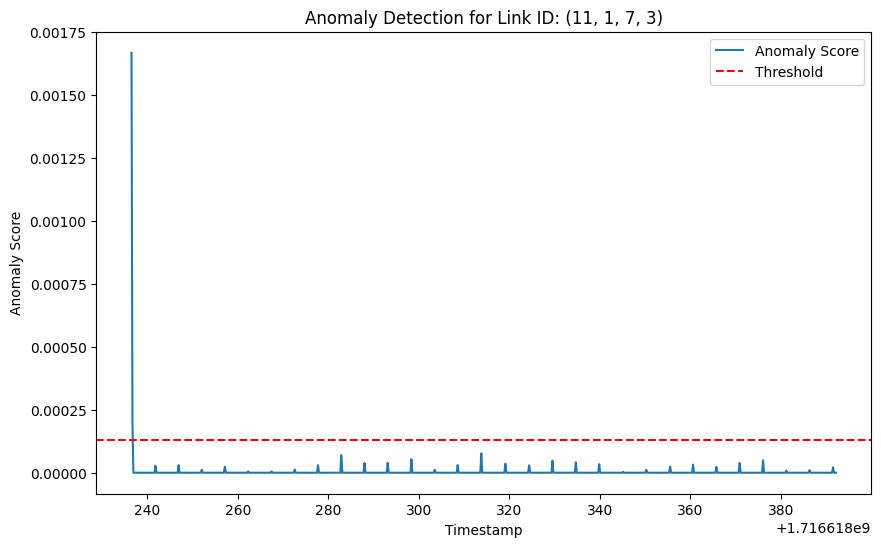

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


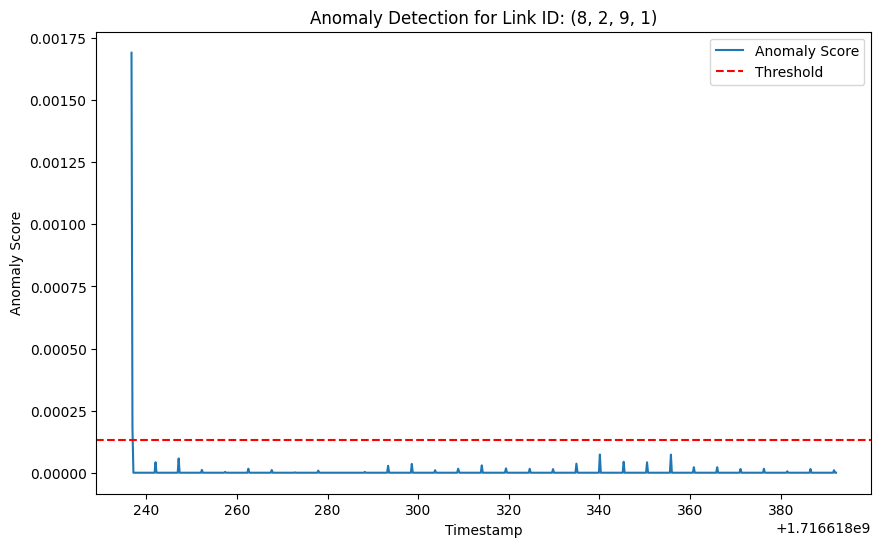

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\s

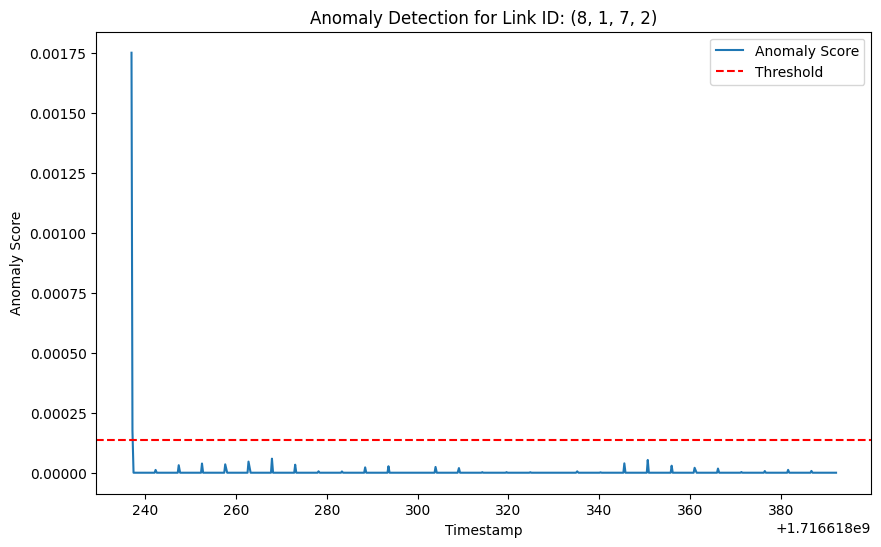

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

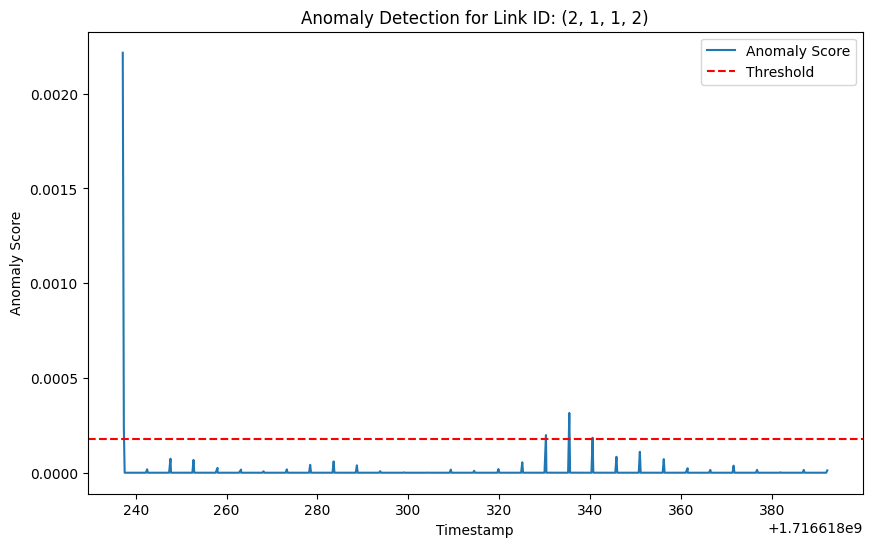

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


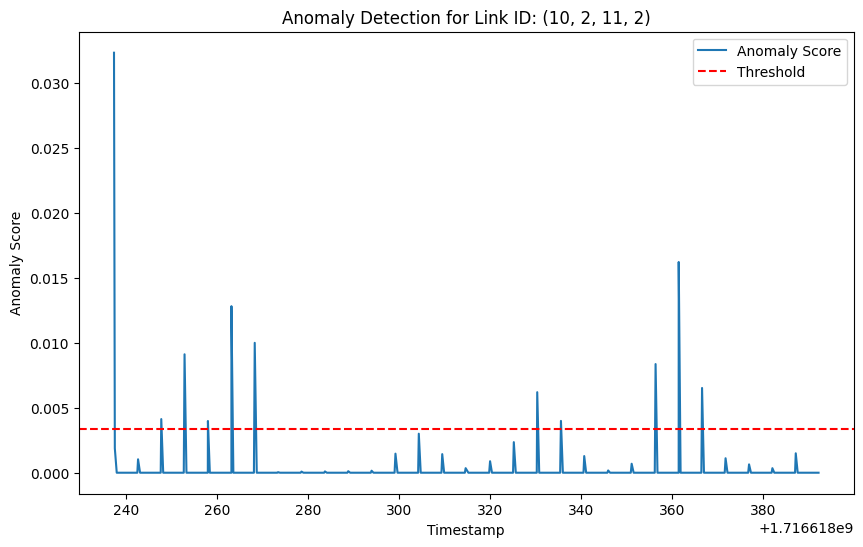

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


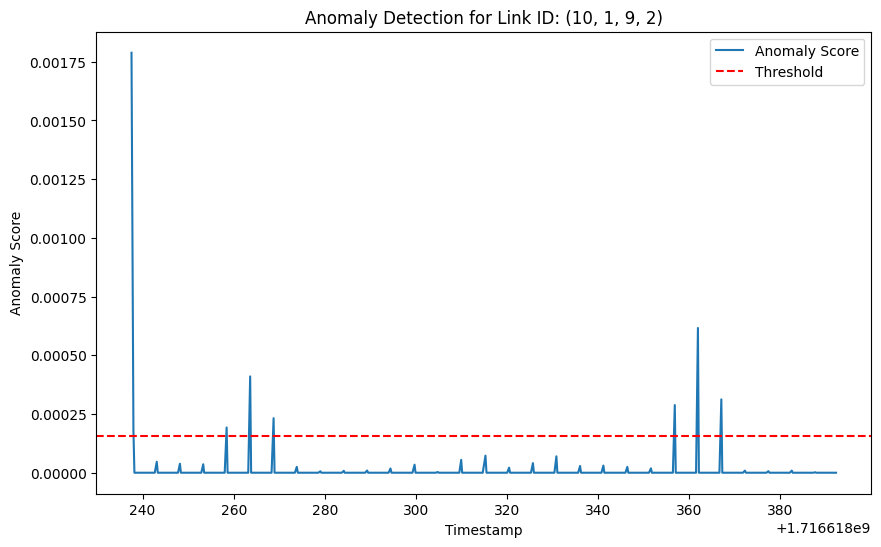

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

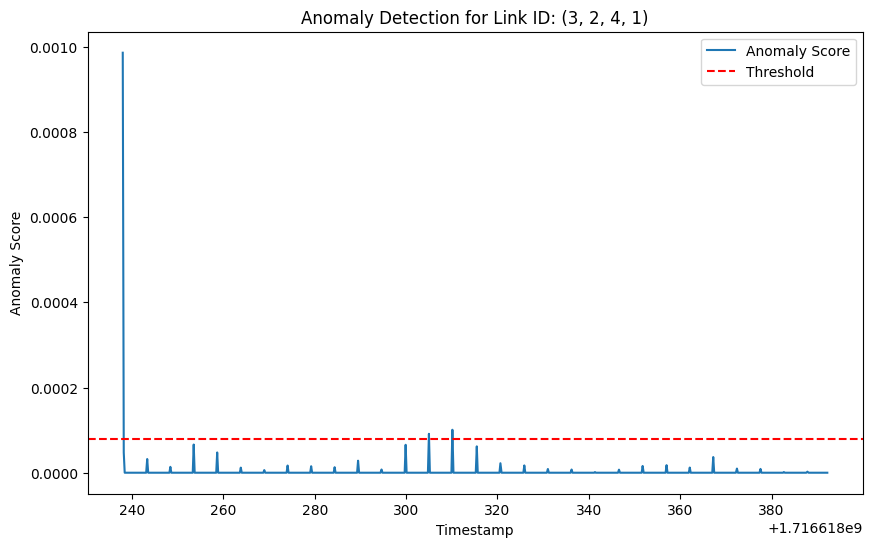

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

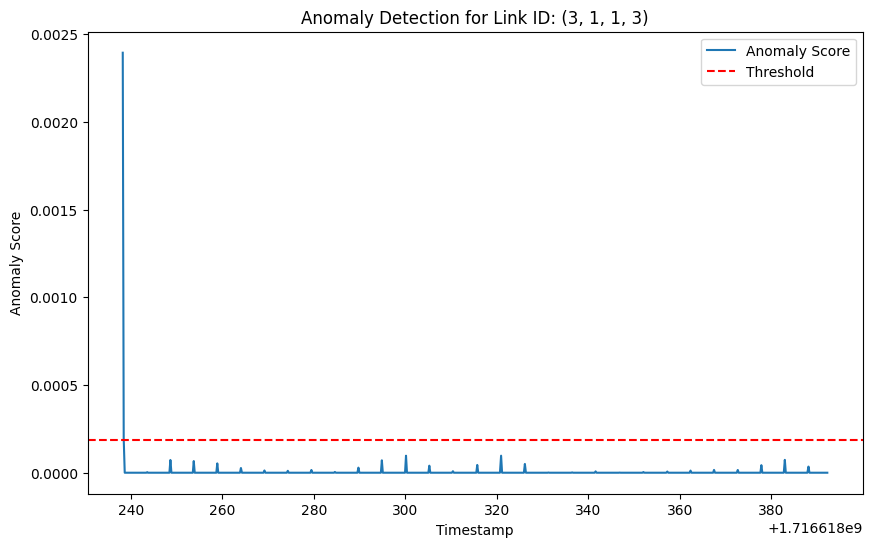

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

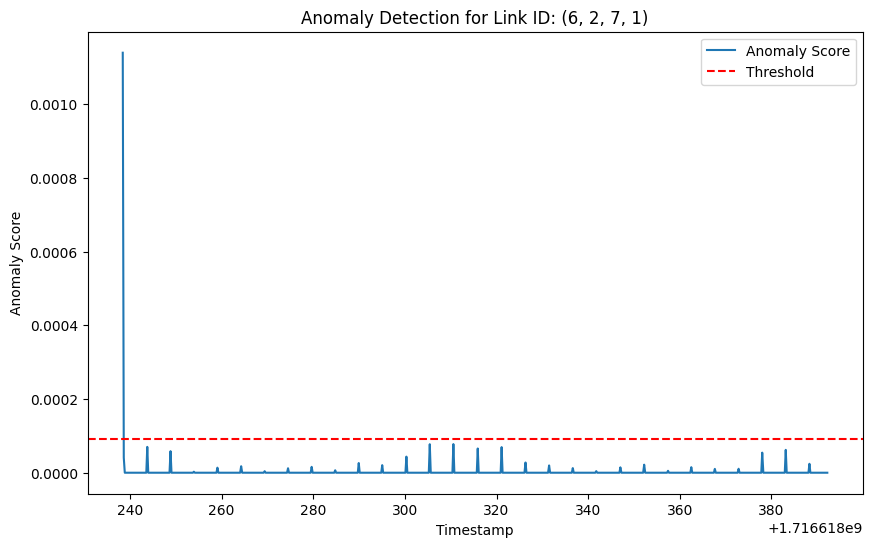

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

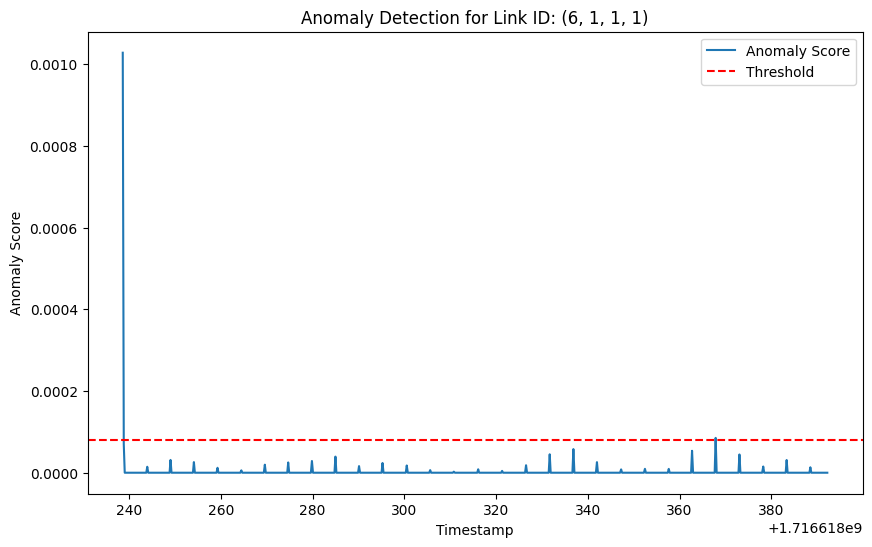

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

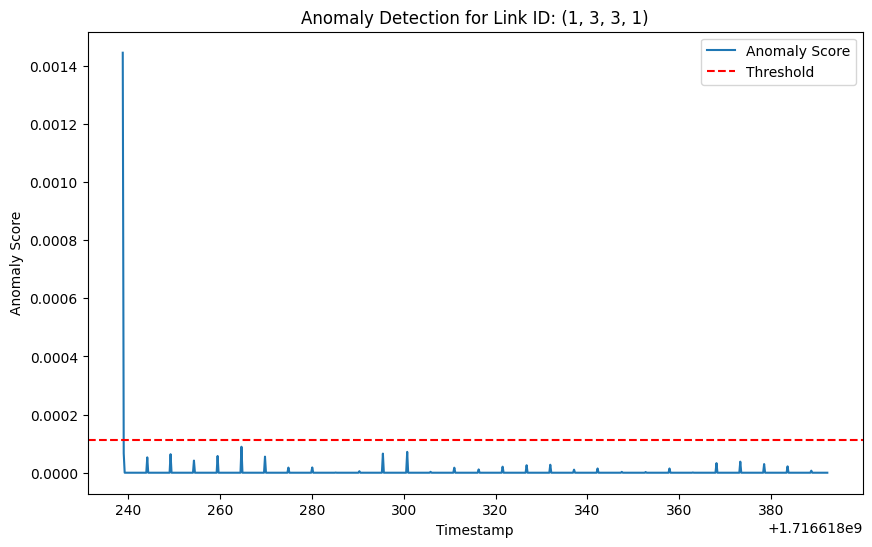

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

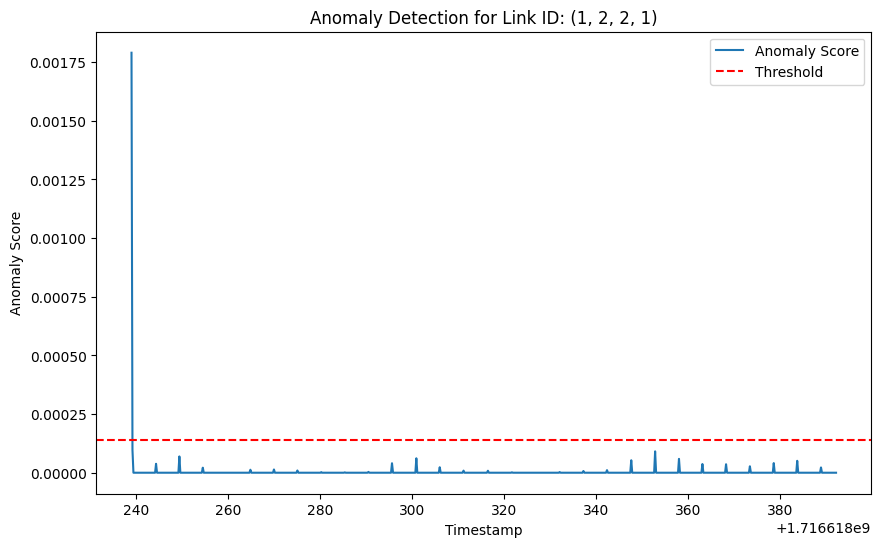

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

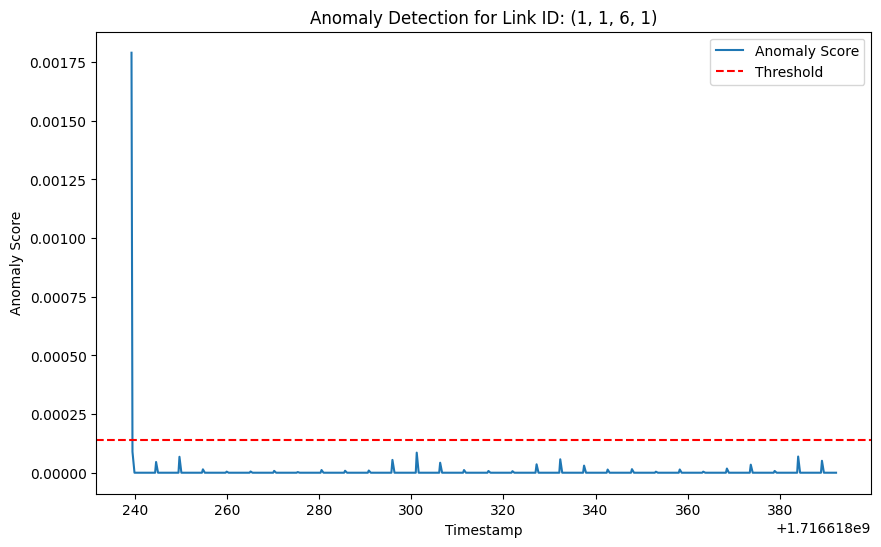

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\base\

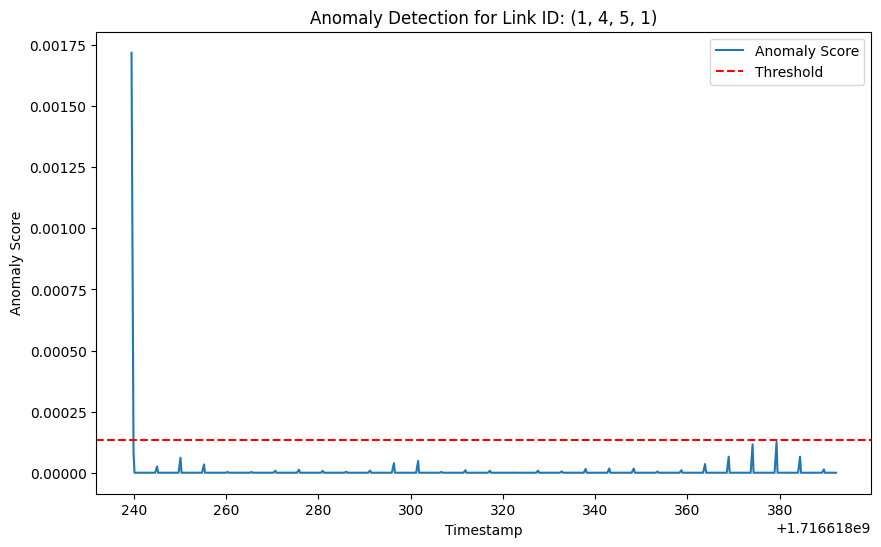

C:\Users\DELL\AppData\Local\Temp\ipykernel_22712\1121731448.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data = df[link_id][1:]
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\CIP_timeseries Analysis\cip\lib\site-packages\statsmodels\tsa\s

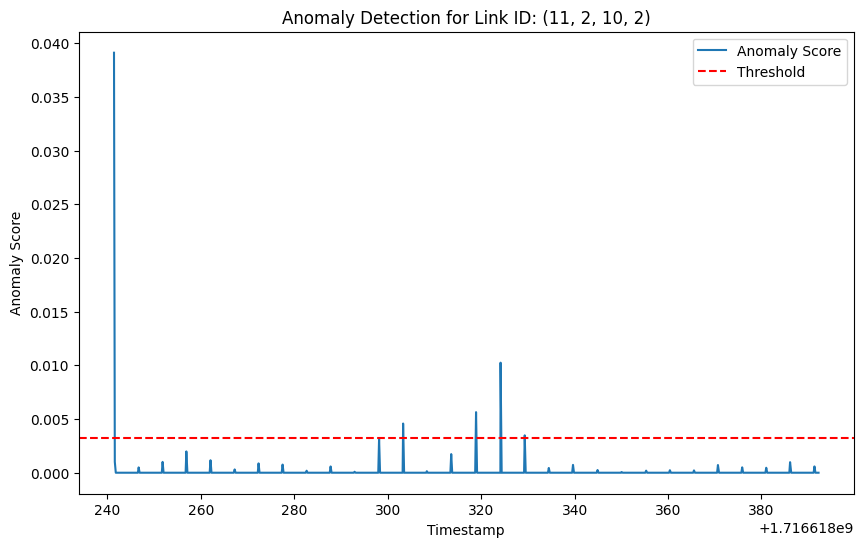

Anomalous Link IDs:
(5, 1, 1, 4)
(4, 1, 3, 2)
(9, 2, 10, 1)
(9, 1, 8, 2)
(7, 3, 11, 1)
(7, 2, 8, 1)
(7, 1, 6, 2)
(11, 1, 7, 3)
(8, 2, 9, 1)
(8, 1, 7, 2)
(2, 1, 1, 2)
(10, 2, 11, 2)
(10, 1, 9, 2)
(3, 2, 4, 1)
(3, 1, 1, 3)
(6, 2, 7, 1)
(6, 1, 1, 1)
(1, 3, 3, 1)
(1, 2, 2, 1)
(1, 1, 6, 1)
(1, 4, 5, 1)
(11, 2, 10, 2)


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA anomaly detection
anomalous_link_ids = []

for link_id in df.columns:
    # Remove the initial timestamp from the data
    data = df[link_id][1:]

    # Fit ARIMA model
    model = ARIMA(data, order=(1,2,1))  # Example order, you might need to adjust this
    model_fit = model.fit()

    # Get residuals
    residuals = pd.Series(model_fit.resid, index=df.index)

    # Calculate anomaly score (absolute residuals)
    anomaly_score = np.abs(residuals)

    # Define anomaly threshold (e.g., 2 standard deviations from the mean)
    threshold = 2 * np.std(anomaly_score)

    # Find anomalous timestamps
    anomalous_timestamps = anomaly_score[anomaly_score > threshold].index

    if len(anomalous_timestamps) > 0:
        anomalous_link_ids.append(link_id)

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(anomaly_score, label='Anomaly Score')
    plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
    plt.xlabel('Timestamp')
    plt.ylabel('Anomaly Score')
    plt.title(f'Anomaly Detection for Link ID: {link_id}')
    plt.legend()
    plt.show()

# Print anomalous link IDs
print("Anomalous Link IDs:")
for link_id in anomalous_link_ids:
    print(link_id)